In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']='False'

In [3]:
# 샘플데이터
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# total_bill과 tip의 관계

In [5]:
# matplotlib 으로 그리기

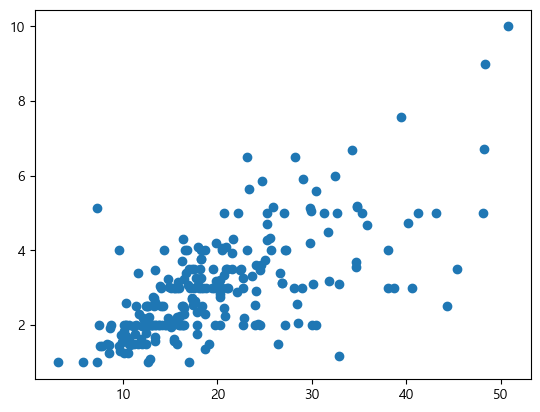

In [7]:
plt.scatter(tips['total_bill'],tips['tip'])
plt.show()

In [8]:
# 요일 구분
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [11]:
# 요일별 서브셋 만들기
tips_Sun=tips[tips['day']=='Sun']

In [12]:
tips_Sat=tips[tips['day']=='Sat']

In [13]:
tips_Thur=tips[tips['day']=='Thur']

In [14]:
tips_Fri=tips[tips['day']=='Fri']

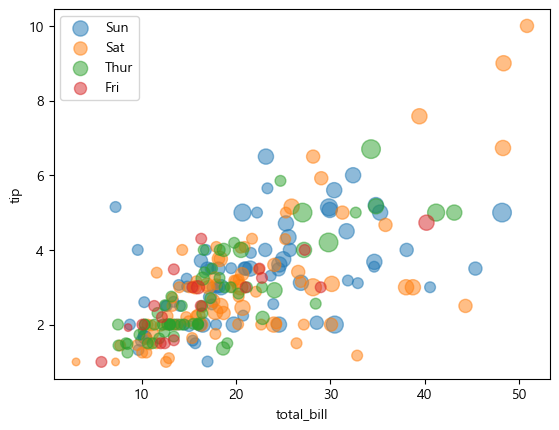

In [19]:
plt.scatter(tips_Sun['total_bill'],tips_Sun['tip'], label='Sun', s=tips_Sun['size']*30, alpha=0.5)
plt.scatter(tips_Sat['total_bill'],tips_Sat['tip'], label='Sat', s=tips_Sat['size']*30, alpha=0.5)
plt.scatter(tips_Thur['total_bill'],tips_Thur['tip'], label='Thur', s=tips_Thur['size']*30, alpha=0.5)
plt.scatter(tips_Fri['total_bill'],tips_Fri['tip'], label='Fri', s=tips_Fri['size']*30, alpha=0.5)
plt.legend()
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

In [20]:
# seaborn 으로 그리기

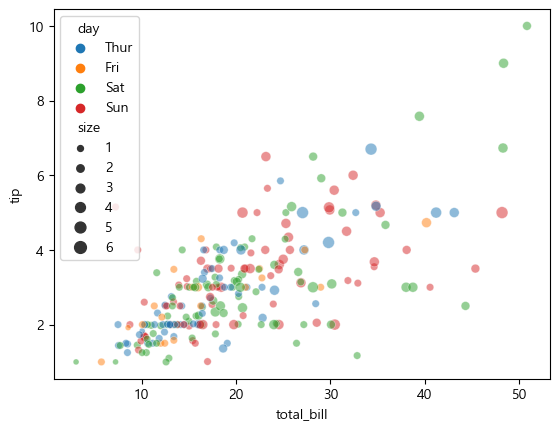

In [25]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', size='size', alpha=0.5)
plt.show()

In [26]:
# 데이터의 추세를 표현하는 lineplot

In [27]:
# 샘플데이터
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [28]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [30]:
flights.shape

(144, 3)

In [31]:
# 연도별 데이터수
flights['year'].value_counts()

1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
Name: year, dtype: int64

In [32]:
# 월별 데이터수
flights['month'].value_counts()

Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: month, dtype: int64

In [33]:
# 연도별 승객수의 변화
# matplotlib으로 시각화

In [34]:
# 데이터 가공

In [36]:
flights_year=flights.groupby('year')['passengers'].sum()
flights_year

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: passengers, dtype: int64

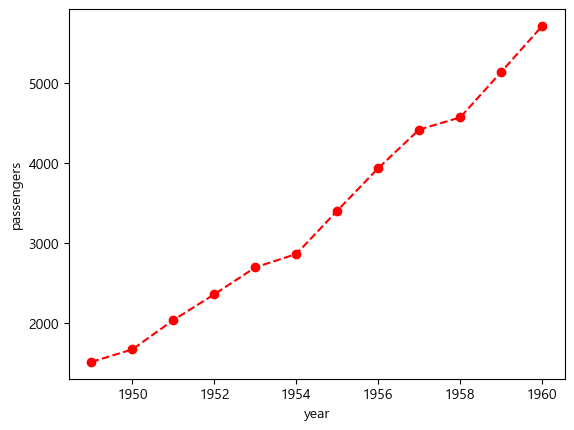

In [39]:
plt.plot(flights_year,'ro--')
plt.xlabel('year')
plt.ylabel('passengers')
plt.show()

<AxesSubplot:xlabel='year', ylabel='passengers'>

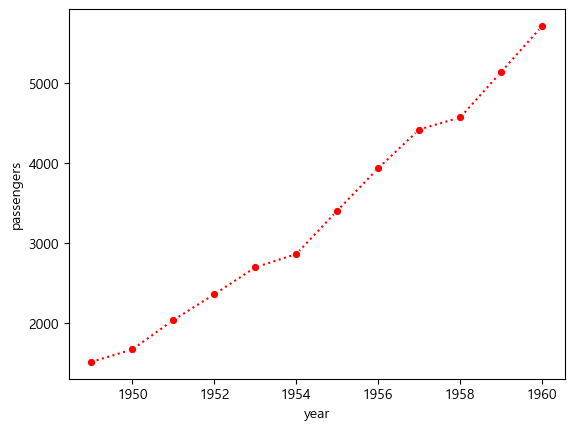

In [43]:
# seaborn으로 그리기
sns.lineplot(data=flights, x='year', y='passengers', ci=None
             , estimator=sum, color='r', marker='o', ls=':')

In [44]:
# 연도-월별 승객수의 변화
# matplotlib으로 시각화

In [45]:
# 데이터 가공

In [47]:
flights_pivot=flights.pivot(index='year', columns='month', values='passengers')
flights_pivot

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


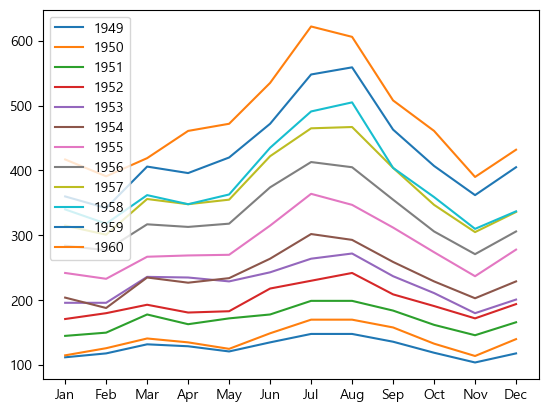

In [53]:
for i in range(12):
    plt.plot(flights_pivot.iloc[i],label=flights_pivot.index[i])
plt.legend()
plt.show()

<AxesSubplot:xlabel='month', ylabel='passengers'>

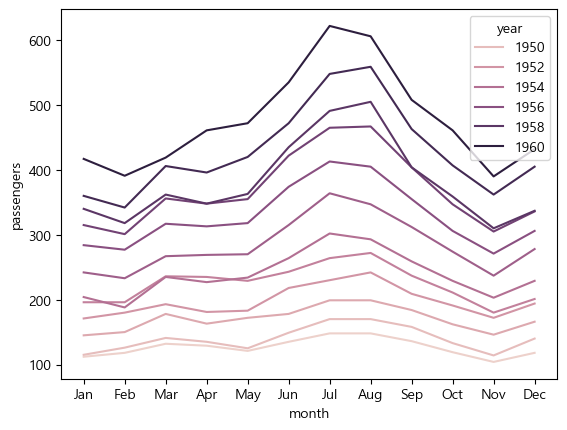

In [55]:
# seaborn으로 시각화
sns.lineplot(data=flights,x='month', y='passengers', ci=None, hue='year')

In [56]:
# 데이터의 분포를 나타내는 여러가지 그래프

In [57]:
# 카운트플롯
# 데이터의 갯수를 카운트하여 시각화

In [58]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


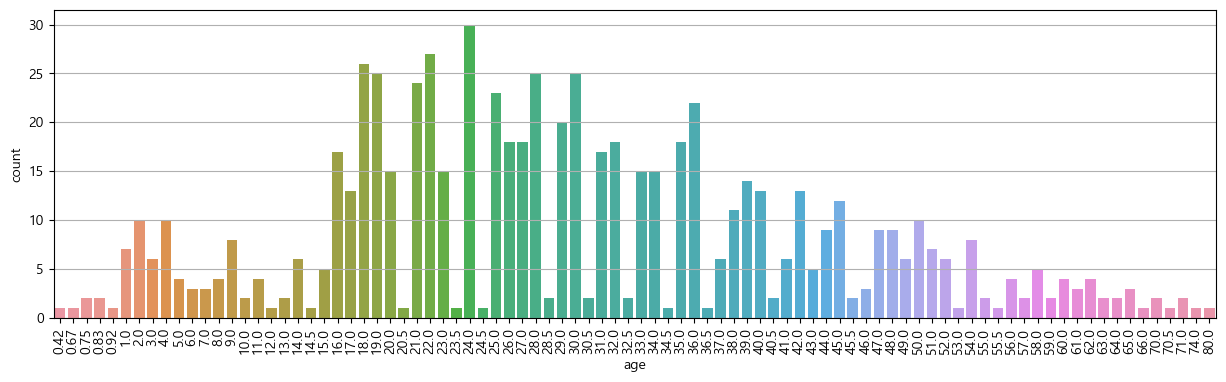

In [62]:
# 연령별 승선인원 카운트하여 시각화
plt.figure(figsize=(15,4))
sns.countplot(data=titanic, x='age')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

<AxesSubplot:xlabel='who', ylabel='count'>

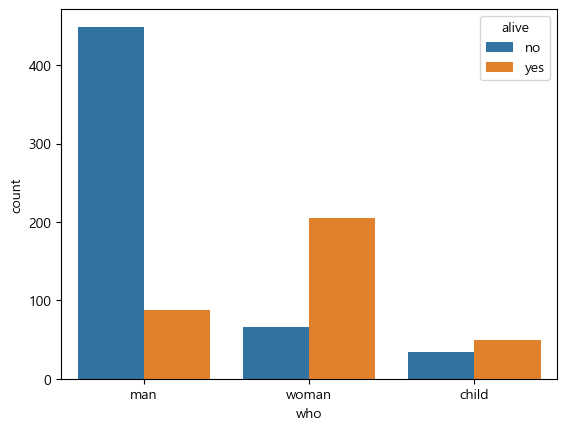

In [65]:
# 1. 남자/여자/어린이 승선인원 시각화
# 2. 남자/여자/어린이 별 생존여부

sns.countplot(data=titanic, x='who', hue='alive')

<AxesSubplot:xlabel='age'>

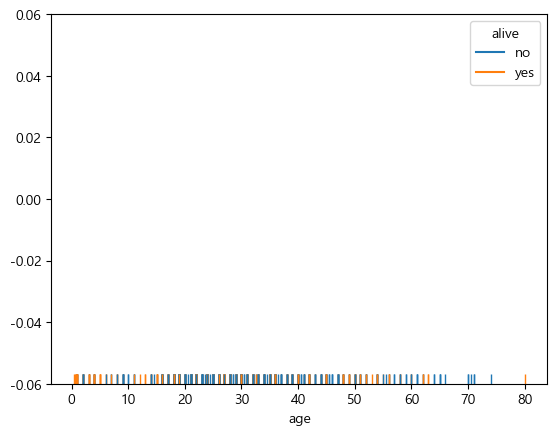

In [67]:
# 러그플롯 데이터포인트를 작은 선분으로 나타낸 그래프
sns.rugplot(data=titanic,x='age',hue='alive')

In [69]:
# 히스토그램
iris=sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


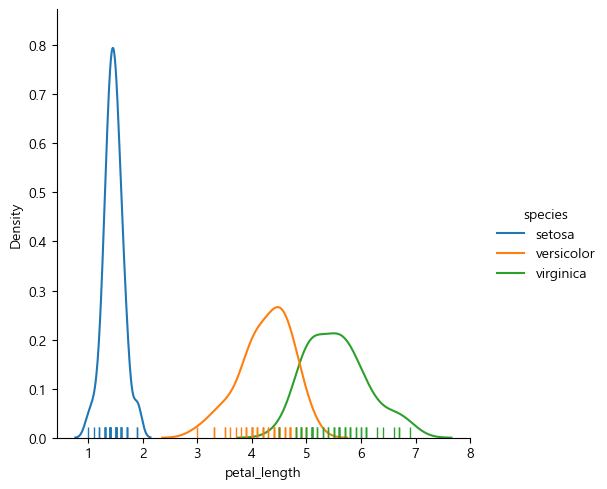

In [76]:
sns.displot(data=iris,x='petal_length'
            , rug=True, hue='species', kind='kde')

In [77]:
# 상자수염그래프, 바이올린플롯, 스트리플롯, 스웜플롯

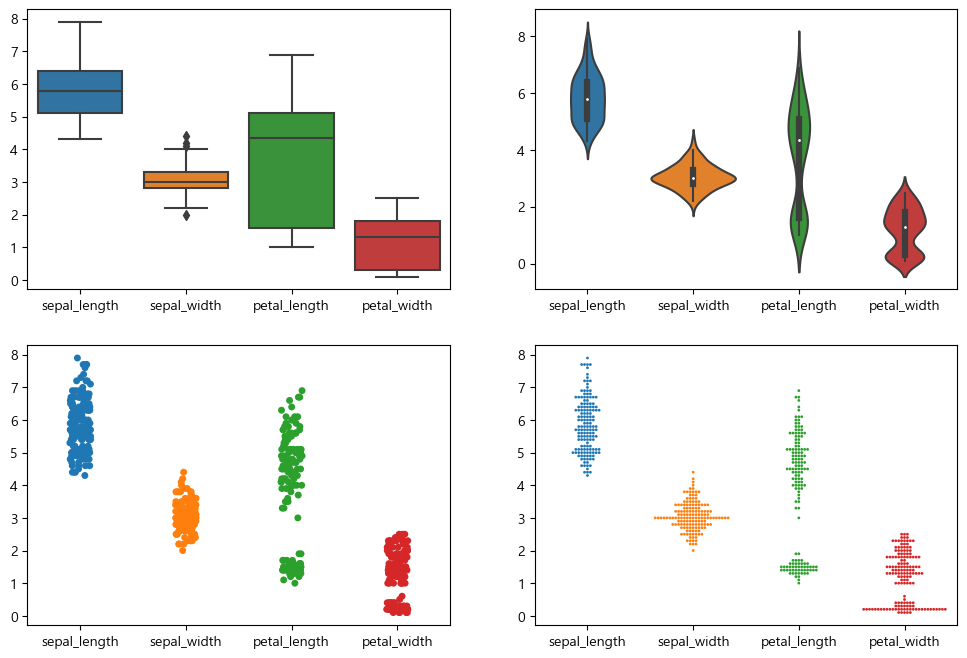

In [84]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(data=iris)
plt.subplot(222)
sns.violinplot(data=iris)
plt.subplot(223)
sns.stripplot(data=iris)
plt.subplot(224)
sns.swarmplot(data=iris, s=2)
plt.show()

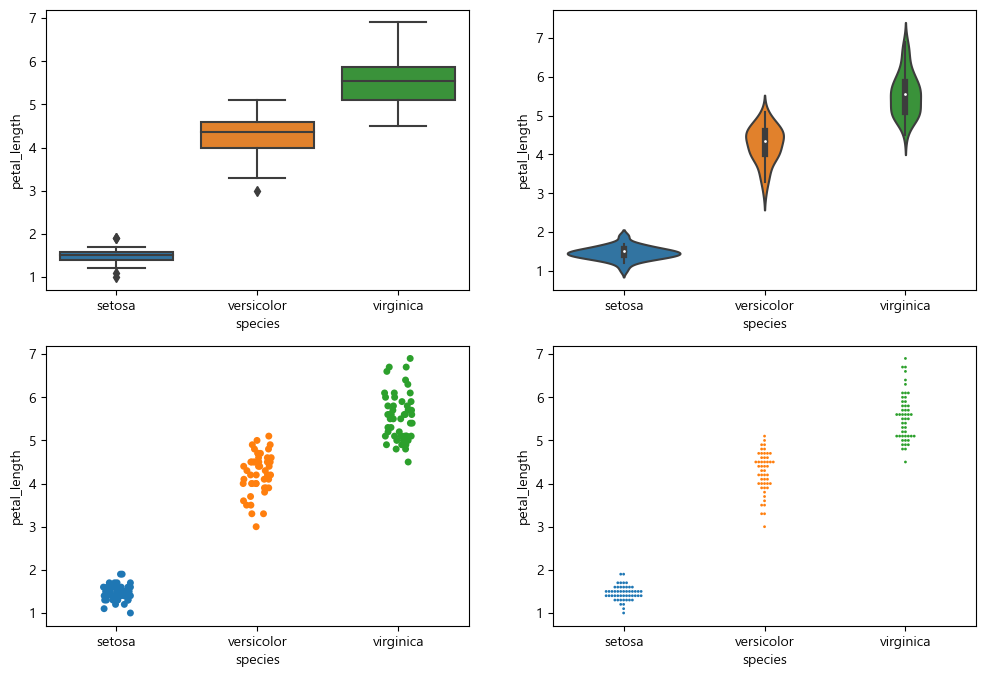

In [88]:
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(data=iris, x='species',y='petal_length')
plt.subplot(222)
sns.violinplot(data=iris, x='species',y='petal_length')
plt.subplot(223)
sns.stripplot(data=iris, x='species',y='petal_length')
plt.subplot(224)
sns.swarmplot(data=iris, s=2, x='species',y='petal_length')
plt.show()